PART 1: DATA CLEANING AND ORGANIZATION 
--------------------------------------
user09_Eating shape: (6195, 10) user09_NonEating shape: (53704, 10)
user10_Eating shape: (8329, 10) user10_NonEating shape: (89055, 10)
user11_Eating shape: (10814, 10) user11_NonEating shape: (40587, 10)
user12_Eating shape: (7219, 10) user12_NonEating shape: (59655, 10)
user13_Eating shape: (10543, 10) user13_NonEating shape: (24159, 10)
user14_Eating shape: (10276, 10) user14_NonEating shape: (23292, 10)
user16_Eating shape: (16425, 10) user16_NonEating shape: (68268, 10)
user17_Eating shape: (23161, 10) user17_NonEating shape: (48378, 10)
user18_Eating shape: (13433, 10) user18_NonEating shape: (28605, 10)
user19_Eating shape: (9951, 10) user19_NonEating shape: (40587, 10)
user21_Eating shape: (16501, 10) user21_NonEating shape: (36316, 10)
user22_Eating shape: (9596, 10) user22_NonEating shape: (31420, 10)
user23_Eating shape: (9050, 10) user23_NonEating shape: (47180, 10)
user24_Eating shape: (18563, 1

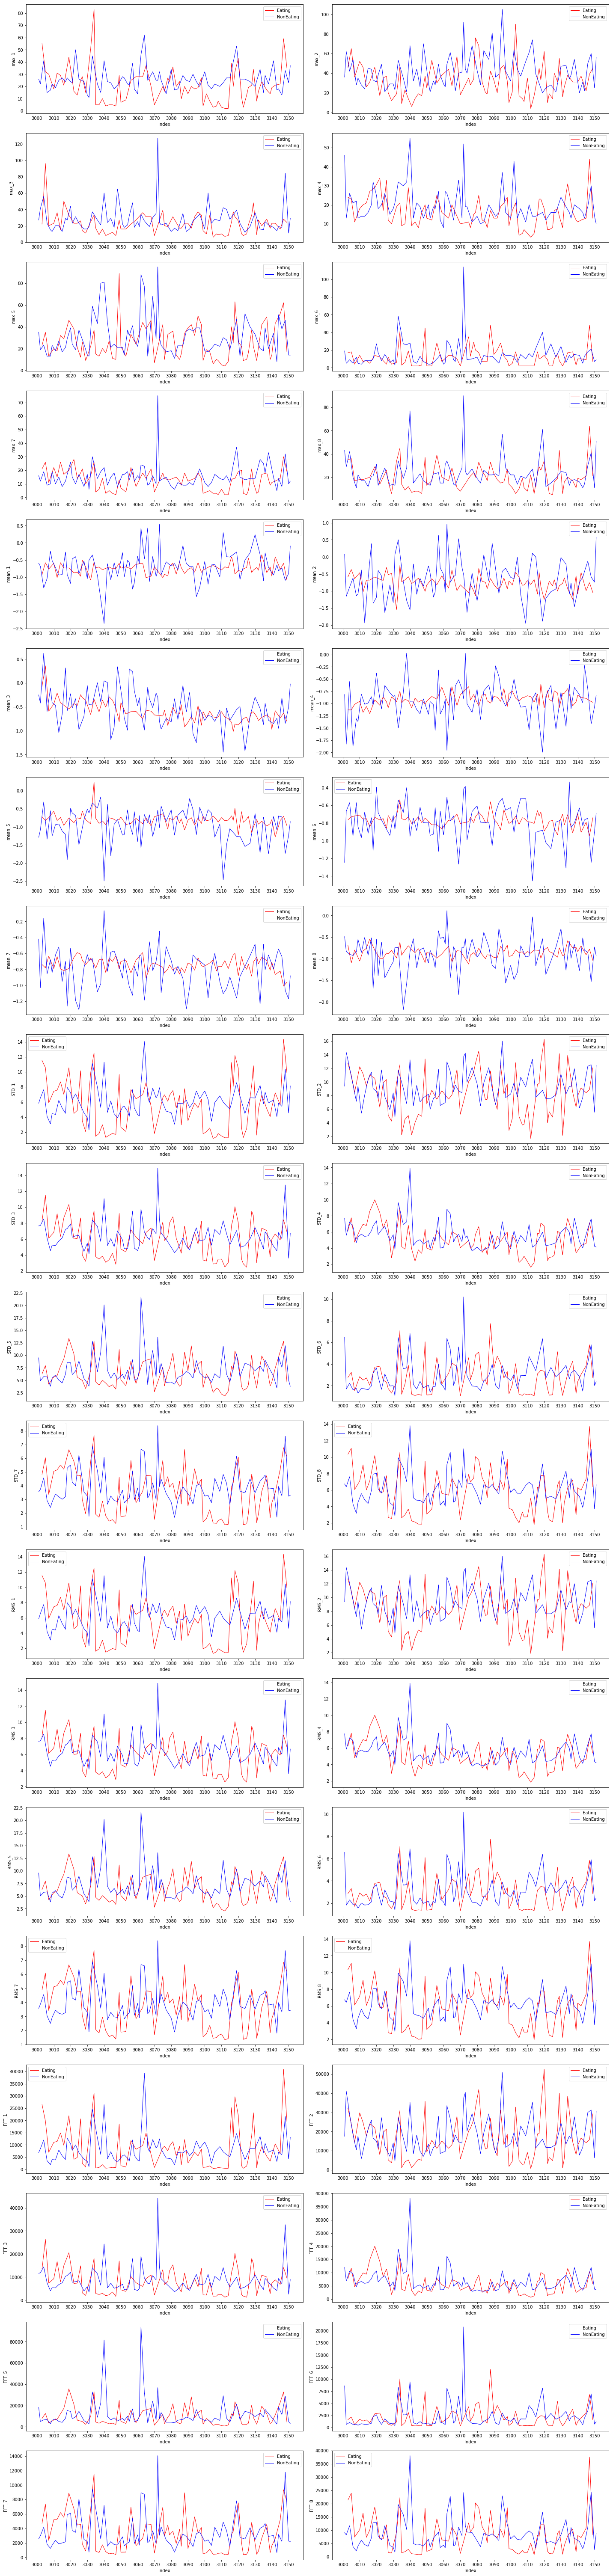


e. Initial intuition does not hold completly true. Documeted observation

 PART-3: FEATURE EXTRACTION 
---------------------------- 


C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:250: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



Subtask2.1: Plotting Principle compontents vs Eigen values


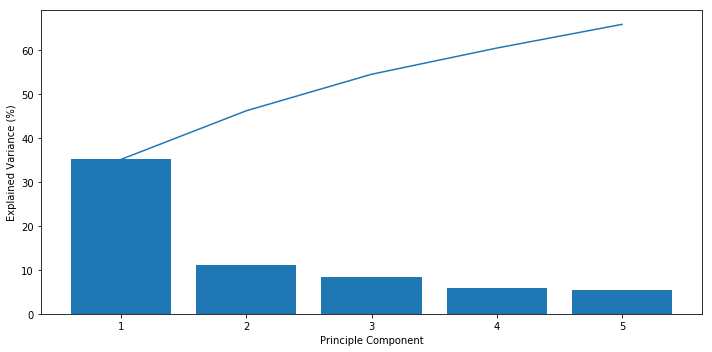


Subtask2.2: Comparing first two principle components


C:\Users\HOME\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


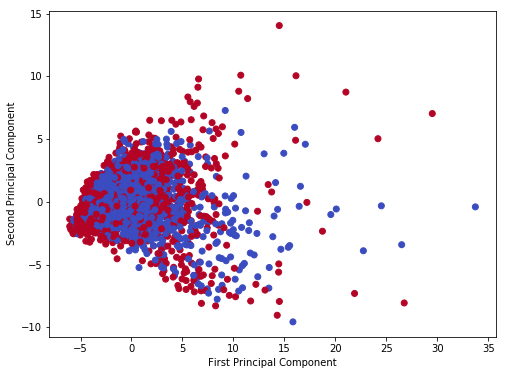


Subtask3: To understand the eigen vectors better, comparing extracted features with eigen vectors


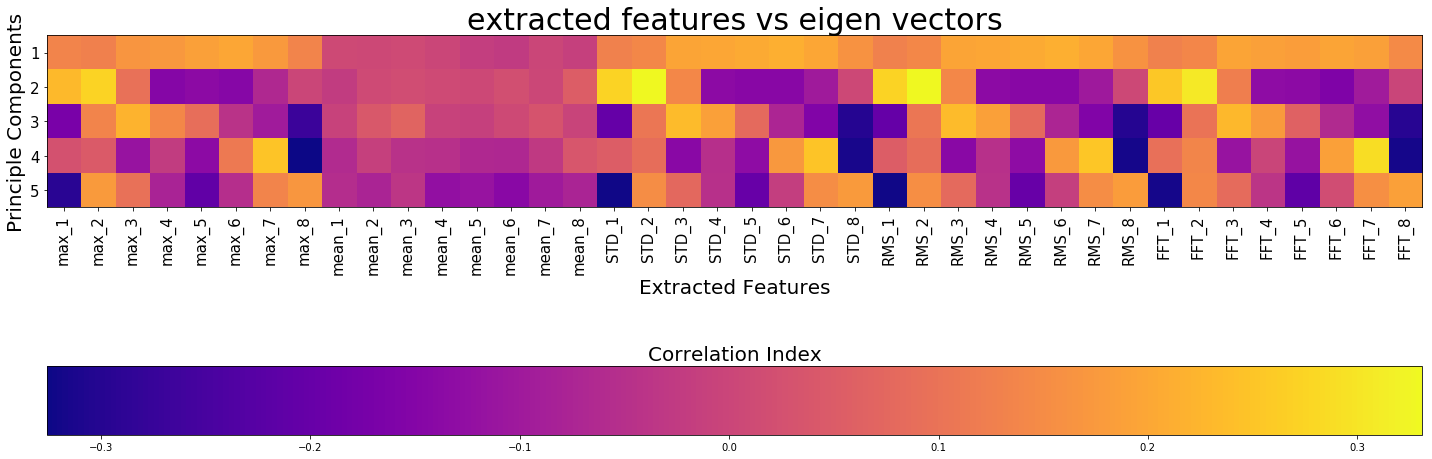


Subtask4: After execution of PCA below is the matrix created 
New Principle component data matrix: 'scaled_data_pca' & its shape: (3152, 5)

Final data matix with PCA data & corresponding labels:'finalData'&its shape: (3152, 6)

Subtask5: Comparing Eating and non-eating with features from PCA


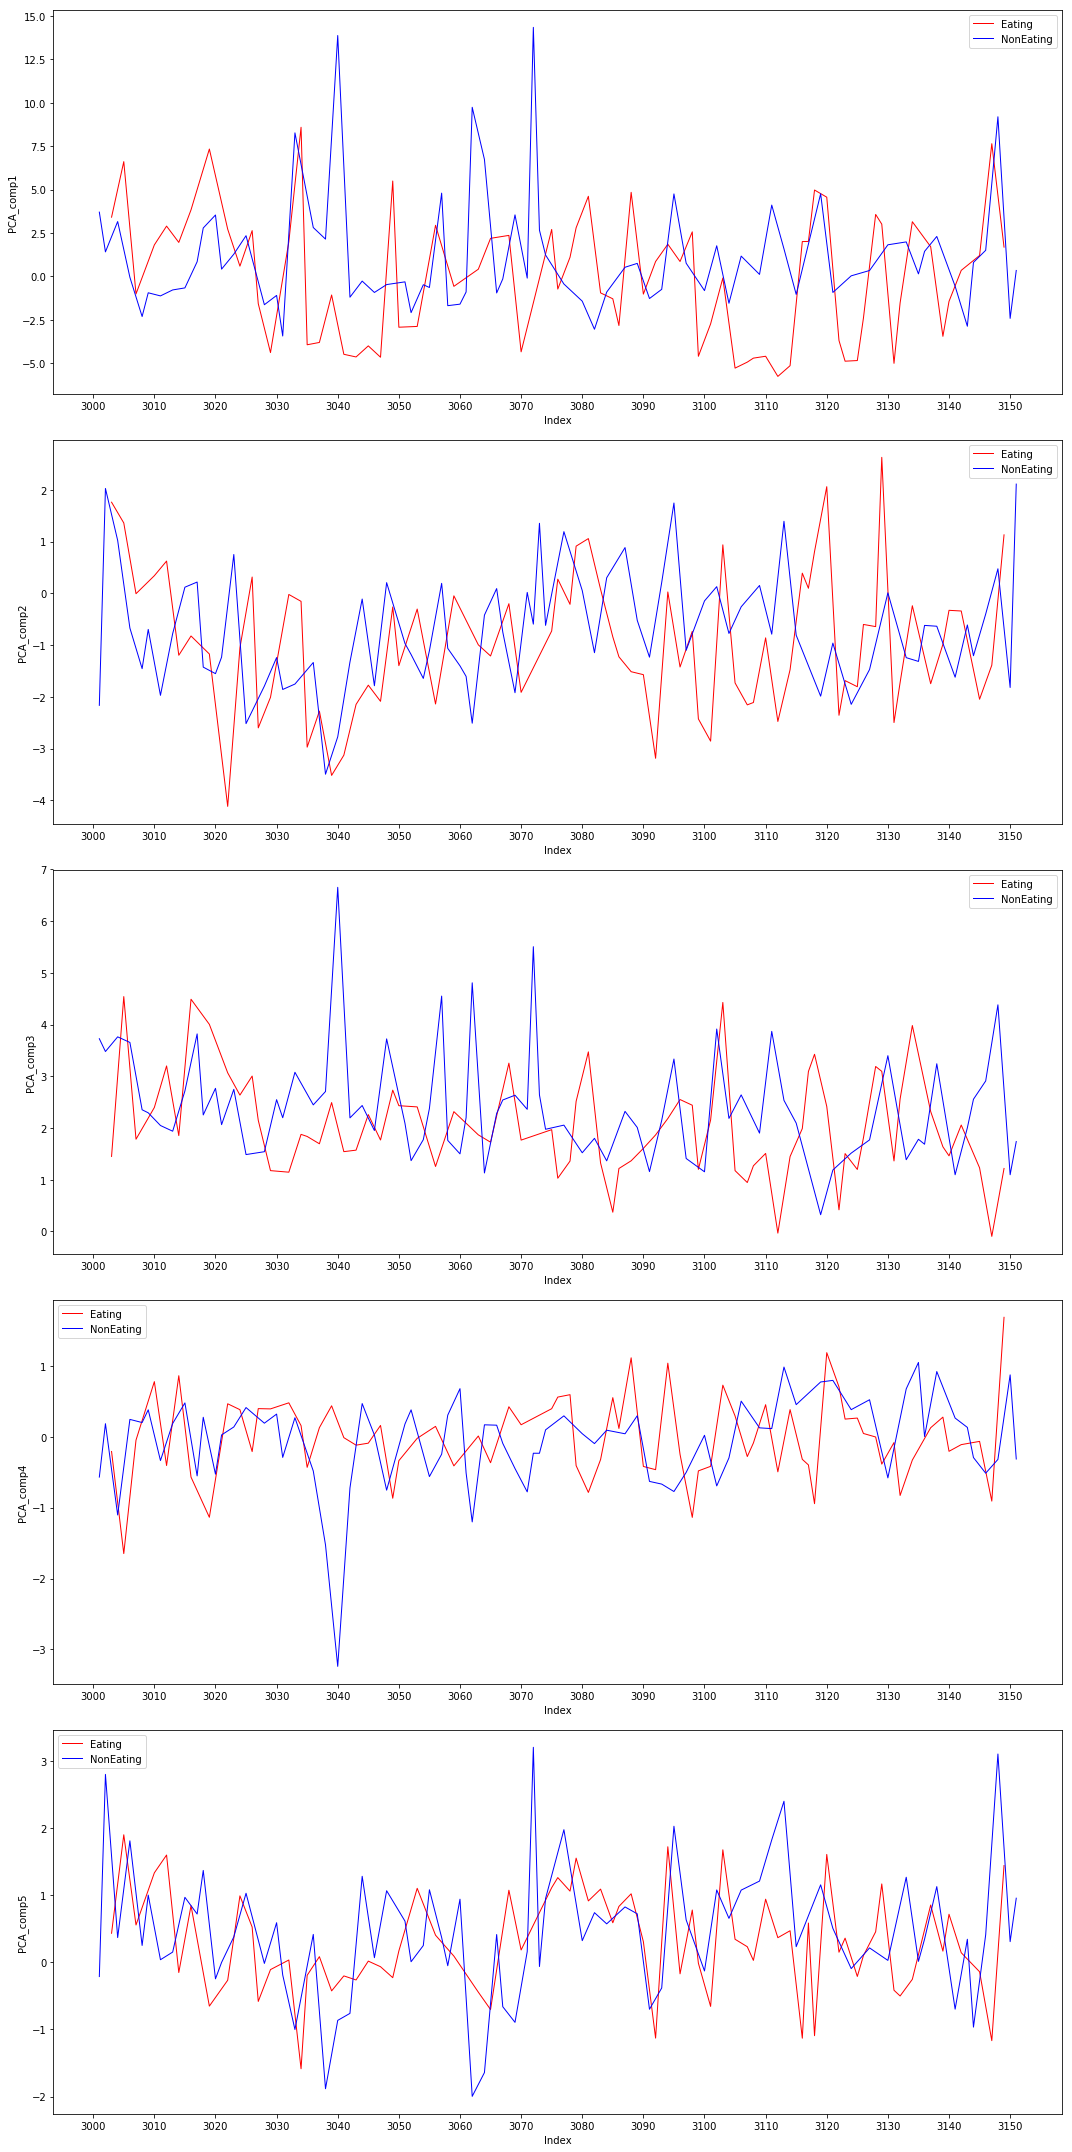

In [1]:
##################### PART-1: DATA CLEANING AND ORGANIZATION #######################################
print("PART 1: DATA CLEANING AND ORGANIZATION \n--------------------------------------")

import os
import glob
import numpy as np
import pandas as pd
labels= ['Start','Stop']
features = ['timestamp','emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']

# Function to create Eating and Non-Eating array for each user
def userEatNonEat(groundTruth_path, features_path):
    """
    Function to return two arrays(Eating and Non-Eating) when provide with groundTruth path and features path.
    
    Parameters: 
    groundTruth_path: groundTruth path to User folder (Ex:'groundTruth\\user09')
    features_path: features path to User folder (Ex: 'MyoData\\user41')
    
    Returns:
    2 arrays: features of Eating and features of Noneating
    """
    # EXTRACTING FORK FEATURE DATA CORRESPONDING TO GROUND TRUTH
    # ----------------------------------------------------------
    # Getting fork ground truth data
    f = glob.glob(groundTruth_path + "*\\fork\\*.txt")
    gt_Fork = pd.read_csv(f[0], usecols = [0,1], names = labels) # converting user fork ground truth data into dataframe 
    gt_Fork = gt_Fork.apply(lambda x: round(x*100/30)).astype(int) # converting frame # to sample # by multiplying by (100/30)
     
    # Getting fork feature data
    f = glob.glob(features_path + "\\fork\\*_EMG.txt")
    f_Fork = pd.read_csv(f[0], names = features) # converting user fork feature data into dataframe 
    f_Fork.reset_index(drop=True, inplace=True) # resetting index
    
    # Getting feature data of eating with fork
    ## picking feature rows based on sample start and end from the ground truth
    f_ForkEating = pd.DataFrame()
    for x in list(range(len(gt_Fork.index))):
        f_ForkEating = f_ForkEating.append(f_Fork[gt_Fork.iloc[x][0]:gt_Fork.iloc[x][1]+1]) 
    
    # Getting feature data of non-eating with fork
    f_ForkNonEating = pd.concat([f_Fork,f_ForkEating]).drop_duplicates(keep=False)
 
    
    # EXTRACTING SPOON FEATURE DATA CORRESPONDING TO GROUND TRUTH
    # -----------------------------------------------------------
    # Getting Spoon ground truth data of each user
    f = glob.glob(groundTruth_path + "*\\spoon\\*.txt")
    gt_Spoon = pd.read_csv(f[0], usecols = [0,1], names = labels) # converting user spoon ground truth data into dataframe 
    gt_Spoon = gt_Spoon.apply(lambda x: round(x*100/30)).astype(int) # converting frame # to sample # by multiplying by (100/30)
    
    # Getting Spoon feature data of each user
    f = glob.glob(features_path + "*\\spoon\\*_EMG.txt") 
    f_Spoon = pd.read_csv(f[0], names = features) # converting user spoon feature data into dataframe 
    f_Spoon.reset_index(drop=True, inplace=True) # resetting index
        
    # Getting feature data of each user eating with Spoon
    ## picking feature rows based on sample start and end from the ground truth
    f_SpoonEating = pd.DataFrame()
    for y in list(range(len(gt_Spoon.index))):
        f_SpoonEating = f_SpoonEating.append(f_Spoon[gt_Spoon.iloc[y][0]:gt_Spoon.iloc[y][1]+1])
        
    # Getting feature data of non-eating with spoon
    f_SpoonNonEating = pd.concat([f_Spoon, f_SpoonEating]).drop_duplicates(keep=False)

    
    
    # COMBAINING EATING DATA (Fork + spoon), NONEATING DATA(Fork + Spoon)
    #---------------------------------------------------------------------
    features_Eating = pd.concat([f_ForkEating, f_SpoonEating])
    features_Noneating = pd.concat([f_ForkNonEating, f_SpoonNonEating])
    
    # Assigning Activity type to the feature arrays
    features_Eating['Activity']=1 # Eating = 1
    features_Noneating['Activity']=0 # Noneating = 0
    
    
    #Returning Eating and Noneating feature arrays for the user
    return(features_Eating,features_Noneating)



# Creating Eating and non-Eating arrays for each users and also for all users
usersEating = dict()
usersNonEating = dict()
features_Eating = pd.DataFrame()
features_Noneating = pd.DataFrame()

for i in ['user'+ str(i).zfill(2) for i in range(9,42)]:
    groundTruth_path = "groundTruth\\"+ i # getting groundTruth path of each user at a time
    features_path = "MyoData\\"+ i # getting features path of each user at a time
    
    # checking if the path exists for both groundTruth and features
    # Note: user folder are not in sequence (no user15 and user20)
    if os.path.exists(groundTruth_path) and os.path.exists(features_path):
        
        # if path exists, collect usersEating and usersNonEating in a dictionary defined above
        usersEating[i + 'Eating'], usersNonEating[i + 'NonEating'] = userEatNonEat(groundTruth_path, features_path)
        
        print (f"{i}_Eating shape: {usersEating[i + 'Eating'].shape}", 
               f"{i}_NonEating shape: {usersNonEating[i + 'NonEating'].shape}")
        
        # Now, combining all users Eating features and also for the Noneating features
        features_Eating = pd.concat([features_Eating, usersEating[i + 'Eating']])
        features_Noneating = pd.concat([features_Noneating, usersNonEating[i + 'NonEating']])

print(f"\nFeature Matrix of all users for Eating: 'features_Eating' & its shape: {features_Eating.shape}."
      f"\nFeature Matrix of all users for Noneating: 'features_Noneating' & its shape: {features_Noneating.shape}.")


# As per the recommendation, selecting random Non-eating samples = Eating samples
features_Noneating_sub = features_Noneating.sample(n=len(features_Eating))
features_Noneating_sub.sort_values('timestamp', inplace =True)

print("\n* Note:As per the recommendation, selecting random Non-eating samples = Eating samples for plotting as wellas rest of the project."
      "\nNew Feature Matrix for Noneating (Subset): 'features_Noneating_sub' & "
      f"its shape: {features_Noneating_sub.shape}.")

############################# PART-2: FEATURE EXTRACTION #######################################
print("\n PART 2: FEATURE EXTRACTION \n -----------------------------")
print("""a. Features are extracted by applying each of the Extraction methods (Maximum, Average, 
   Standard Deviation, Root Mean Square(RMS), Fast Fourier Transform(FFT)) by columnwise and by 
   aggregating 200 rows at a time
   \nb. Intution on why use a feature extracted is documented""")

# Defining the functions for extraction
from numpy import mean, sqrt, square

def STD(data):
    """
    Description: Returns standard deviation value of the input
    """
    return data.std()

def RMS(data):
    """
    Description: Returns Root Mean Square value of the input
    """
    return sqrt(mean(square(data)))

def FFT(data):
    """
    Description: Returns variance of Fast Fourier Transformation of the input
    
    """
    fft = np.fft.fft(data, axis =0).var(axis=0)
    return pd.DataFrame(fft).transpose()


print("\nFunction: 'featureExtraction' is used to create 2 new arrays of extracted new feature for Eating and Noneating dataset created in task1")
def featureExtraction (features_Eating, features_Noneating_sub):
    """
    Description: Function to returns two arrays of extracted features by applying 5 extraction menthods: max, Mean, STD, RMS, FFT
    
    Parameters: 2 arrays
        features_Eating: features of eating activity
        features_Noneating_sub: features of non-eating activity
    
    Returns: 2 arrays
        extracted_Eating: contain 40 new features, timestamp and label for eating activity
        extracted_Noneating: contain 40 new features, timestamp and label for non-eating activity
    """
    
    extracted_Eating = pd.DataFrame()
    extracted_Noneating = pd.DataFrame()

    methods = ['max','mean','STD','RMS','FFT']
    numbers = [str(i) for i in range(1,9)]

    for i in range(len(methods)):
        n = 200 # apply funciton on every n rows for each column

        # Applying each method on the group of n rows for each feature (Eating)
        X = features_Eating.iloc[:, 1:9].groupby(np.arange(len(features_Eating))//n).apply(eval(methods[i]))
        X.columns = [methods[i]+"_"+numbers[j] for j in range(len(numbers))] #adding feature names to the above resulting array
        X.reset_index(drop=True, inplace=True) # resetting index
        extracted_Eating = pd.concat([extracted_Eating, X],axis =1) #combining all extracted Eating features

        # Applying each method on the group of n rows for each feature (Non-Eating)
        Y = features_Noneating_sub.iloc[:, 1:9].groupby(np.arange(len(features_Noneating_sub))//n).apply(eval(methods[i]))
        Y.columns = [methods[i]+"_"+numbers[j] for j in range(len(numbers))] #adding feature names to the above resulting array
        Y.reset_index(drop=True, inplace=True) # resetting index
        extracted_Noneating = pd.concat([extracted_Noneating, Y],axis =1) #combining all extracted Non-Eating features

    # Adding 'timestamp' and 'Activity' columns for extracted Eating and Non-eating features
    extracted_Eating['timestamp'] = round(features_Eating['timestamp'].groupby(np.arange(len(features_Eating))//n).mean())
    extracted_Eating['Activity']=1 # Eating = 1
    extracted_Noneating['timestamp'] = round(features_Noneating_sub['timestamp'].groupby(np.arange(len(features_Noneating_sub))//n).mean())
    extracted_Noneating['Activity']=0 # Noneating = 0
    
    
    return(extracted_Eating,extracted_Noneating)
    

extracted_Eating,extracted_Noneating = featureExtraction (features_Eating, features_Noneating_sub)  
print(f"Extracted Feature Matrix for Eating: 'extracted_Eating' & its shape: {extracted_Eating.shape}\n"
      f"Extracted Feature Matrix for Noneating: 'extracted_Noneating' & its shape: {extracted_Noneating.shape}")


# Based on recomendation, combaining the extracted_eating and extracted_noneating
extracted_Features = pd.concat([extracted_Eating, extracted_Noneating]).sort_values('timestamp')
extracted_Features.reset_index(drop=True, inplace=True)
print(f"Combined Extracted Features(Eating + Noneating) Matrix: 'extracted_Features' & its shape: {extracted_Features.shape}")


## d. Generating plotts corresponding to eating and non-eating activities 
print("\nd. Generating plotts corresponding to Eating and Noneating activities")
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
fig = plt.figure(figsize = (20,100))

# Loop to generate plots for all the extracted 40 features with the index and comparing Eating vs Non-eating
for i,num in zip(extracted_Features.columns[:40],range(1,41)):
    ax = fig.add_subplot(24,2,num)
    fig.subplots_adjust(hspace=0.5) #, wspace=0.4)
    
    # x1,y1 for eating; x2,y2 for non-eating
    x1 = extracted_Features[(extracted_Features['Activity'] == 1) & (extracted_Features.index>3000)].index
    x2 = extracted_Features[(extracted_Features['Activity'] == 0) & (extracted_Features.index>3000)].index
    y1 = extracted_Features[(extracted_Features['Activity'] == 1) & (extracted_Features.index>3000)][i]
    y2 = extracted_Features[(extracted_Features['Activity'] == 0) & (extracted_Features.index>3000)][i]
    
    ax.plot(x1, y1, lw = 1, color = 'red', label = 'Eating') # marker = 'o'
    ax.plot(x2, y2, lw = 1, color = 'blue', label = 'NonEating') # marker = 's'

    ax.set_xlabel('Index')
    ax.set_ylabel(i)
    ax.legend(loc=0)
    ax.set_xticks(np.arange(3000,len(extracted_Features),10))

    
plt.tight_layout()
plt.show()

print("\ne. Initial intuition does not hold completly true. Documeted observation")


############################# PART-3: FEATURE SELECTION #######################################
print("\n PART-3: FEATURE EXTRACTION \n---------------------------- ")

# PRINCIPLE COMPONENT ANALYSIS (PCA)
ext_features = extracted_Features.iloc[:,:40] # extracted features from above
label = extracted_Features.iloc[:,41] # Label information from above
feature_names = ext_features.columns # extracted feature names

## Scaling the data using sklear StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(ext_features)
scaled_data = sc.transform(ext_features) # Scaled data

## Applying the PCA on the scaled data 
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(scaled_data)
scaled_data_pca = pca.transform(scaled_data) # to get PCA data
eigen_values = pca.explained_variance_ratio_ # to get Eigen values
eigen_vectors = pca.components_              # to get Eigen vectors

## Plotting Principle compontents vs Eigen values
print("\nSubtask2.1: Plotting Principle compontents vs Eigen values")
df= pd.DataFrame(eigen_values * 100, columns = ['Explained Variance %']).astype(float)

X = range(1, len(df['Explained Variance %'])+1,1)
y = np.cumsum(df['Explained Variance %']) #Extracted features
y1= df['Explained Variance %']
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X,y)
ax.bar(X,y1)
ax.set_xlabel('Principle Component')
ax.set_ylabel('Explained Variance (%)')
fig.tight_layout()
plt.show()


## Comparing first and second principle components
print("\nSubtask2.2: Comparing first two principle components")
plt.figure(figsize =(8,6))
plt.scatter(scaled_data_pca[:,0],scaled_data_pca[:,1], c = label, cmap = 'coolwarm' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()



print("\nSubtask3: To understand the eigen vectors better, comparing extracted features with eigen vectors")
## Comparing Extracted features with with eigen vectors
pca_VS_features= pd.DataFrame(eigen_vectors, columns = ext_features.columns)
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
X = pca_VS_features.columns
y = pca_VS_features.index 
fig, ax = plt.subplots(figsize = (20,15)) # figsize = (12,12)
heatmap = ax.imshow(pca_VS_features, cmap ='plasma', interpolation='nearest')
cbar = plt.colorbar(heatmap,orientation="horizontal")
cbar.ax.set_title('Correlation Index', fontsize=20)
ax.set_xticks(np.arange(len(X)))
ax.set_yticks(np.arange(len(y)))
ax.set_xlabel('Extracted Features',fontsize=20)
ax.set_ylabel('Principle Components',fontsize=20)
ax.set_xticklabels(labels = X, rotation='vertical', fontsize=15)
ax.set_yticklabels(labels = y+1, fontsize=15)
ax.set_title("extracted features vs eigen vectors", fontsize=30)
fig.tight_layout()
plt.show()

print("\nSubtask4: After execution of PCA below is the matrix created \n"
    f"New Principle component data matrix: 'scaled_data_pca' & "
    f"its shape: {scaled_data_pca.shape}")

# Creating Final data matix with PCA data and corresponding labels
pcaData = pd.DataFrame(scaled_data_pca, columns = ['PCA_comp'+ str(i) for i in range(1,6)])
finalData = pd.concat([pcaData, label], axis =1 )

print(f"\nFinal data matix with PCA data & corresponding labels:'finalData'&its shape: {finalData.shape}")

print("\nSubtask5: Comparing Eating and non-eating with features from PCA")
## Generating plotts corresponding to eating and non-eating activities with PCA data
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
fig = plt.figure(figsize = (15,30))

for i,num in zip(finalData.columns[:5],range(1,41)):
    ax = fig.add_subplot(5,1,num)
    fig.subplots_adjust(hspace=0.5)
    
    x1 = finalData[(finalData['Activity'] == 1) & (finalData.index>3000)].index
    x2 = finalData[(finalData['Activity'] == 0) & (finalData.index>3000)].index
    y1 = finalData[(finalData['Activity'] == 1) & (finalData.index>3000)][i]
    y2 = finalData[(finalData['Activity'] == 0) & (finalData.index>3000)][i]
    
    ax.plot(x1, y1, lw = 1, color = 'red', label = 'Eating') # marker = 'o'
    ax.plot(x2, y2, lw = 1, color = 'blue', label = 'NonEating') # marker = 's'
    ax.set_xlabel('Index')
    ax.set_ylabel(i)
    ax.legend(loc=0)
    ax.set_xticks(np.arange(3000,len(finalData),10))
    
plt.tight_layout()
plt.show()